In [42]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [43]:
#data synthetic
def synthetic_data(w,b,num_examples):#mat,mat,number of examples
    x=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)


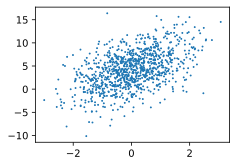

In [44]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(),labels.detach().numpy(),1)

In [45]:
#读取数据值
def data_iter(batch_size,feature,labels):
    num_examples=len(feature)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [46]:
batch_size=10

for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[ 1.9216, -1.2004],
        [-0.4873, -1.5278],
        [ 0.4303,  0.9961],
        [-0.4028,  0.7219],
        [ 0.4164, -0.4743],
        [-0.5587, -1.1988],
        [-0.2254, -0.5070],
        [ 0.1793, -0.0200],
        [ 1.0962, -2.0318],
        [-1.8872, -0.9758]]) 
 tensor([[12.1201],
        [ 8.4233],
        [ 1.6862],
        [ 0.9480],
        [ 6.6425],
        [ 7.1539],
        [ 5.4703],
        [ 4.6133],
        [13.3142],
        [ 3.7351]])


In [47]:
w=torch.normal(0,0.1,size=(2,1),requires_grad=True)
b=torch.zeros((1),requires_grad=True)

In [48]:
def linear(x,w,b):
    return torch.matmul(x,w)+b 

In [49]:
def squared_loss(y_hat, y):  #@save
    return ((y_hat - y.reshape(y_hat.shape)) ** 2 / 2).sum()

In [50]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for i in params:
            i.data-=lr/batch_size*i.grad
            i.grad.zero_()

In [51]:
lr = 0.03
num_epochs = 3
net = linear
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.backward()#backward之后,requird_grad为True的参数就会计算所累计的梯度
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数,优化函数
    with torch.no_grad():#测试所得到的权重和偏置的质量
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l):f}')

epoch 1, loss 38.252575
epoch 2, loss 0.150859
epoch 3, loss 0.052841


In [52]:
w,b

(tensor([[ 2.0000],
         [-3.3997]], requires_grad=True),
 tensor([4.2004], requires_grad=True))